Distribuição normal - 20/11

A partir de um conjunto de valores para uma variável aleatória, escreva código Python para calcular um intervalo de confiança de 90% para um valor dado de entrada. Use o submódulo scipy.stats.t

In [1]:
import numpy as np
from scipy.stats import t

def intervalo_confianca_90(dados, valor):
    dados = np.array(dados)
    n = len(dados)
    media = np.mean(dados)
    s = np.std(dados, ddof=1)   # desvio padrão amostral
    erro_padrao = s / np.sqrt(n)

    # valor crítico t para IC de 90% (alpha = 0.10)
    t_crit = t.ppf(1 - 0.05, df=n-1)   # 1 - alpha/2

    margem = t_crit * erro_padrao

    ic_inferior = valor - margem
    ic_superior = valor + margem

    return ic_inferior, ic_superior

# Exemplo de uso
dados_exemplo = [12, 15, 14, 13, 16, 14, 15, 17, 13, 15]
valor_dado = 14.5

ic = intervalo_confianca_90(dados_exemplo, valor_dado)
print("Intervalo de confiança de 90%:", ic)


Intervalo de confiança de 90%: (np.float64(13.627263679334519), np.float64(15.372736320665481))


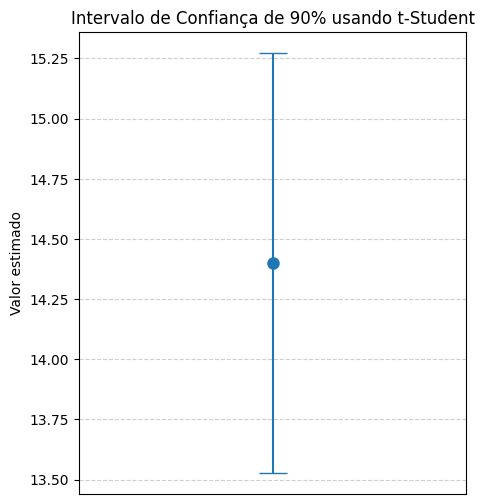

In [2]:
import matplotlib.pyplot as plt

# Função para cálculo do IC 90%
def ic_90(dados):
    dados = np.array(dados)
    n = len(dados)
    media = np.mean(dados)
    s = np.std(dados, ddof=1)
    erro = s / np.sqrt(n)
    t_crit = t.ppf(0.95, df=n-1)
    margem = t_crit * erro
    return media, margem

# Exemplo de dados
dados = [12, 15, 14, 13, 16, 14, 15, 17, 13, 15]

media, margem = ic_90(dados)

# Plot do IC
plt.figure(figsize=(5, 6))
plt.errorbar(
    x=[0],
    y=[media],
    yerr=[margem],
    fmt='o',
    capsize=10,
    markersize=8
)

plt.xticks([])
plt.title("Intervalo de Confiança de 90% usando t-Student", fontsize=12)
plt.ylabel("Valor estimado")

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
